# Iris 분류문제 풀기 : LDA

https://en.wikipedia.org/wiki/Iris_flower_data_set

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import load_iris

In [3]:
iris = load_iris()
X = iris.data
y = iris.target

In [4]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [5]:
model_lda = LinearDiscriminantAnalysis().fit(X, y)

In [6]:
yhat = model_lda.predict(X)

In [7]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve

In [8]:
confusion_matrix(y, yhat)

array([[50,  0,  0],
       [ 0, 48,  2],
       [ 0,  1, 49]])

In [9]:
print(classification_report(y, yhat))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        50
          1       0.98      0.96      0.97        50
          2       0.96      0.98      0.97        50

avg / total       0.98      0.98      0.98       150



In [10]:
from sklearn.preprocessing import label_binarize
y_multi = label_binarize(y, classes=[0, 1, 2])

In [11]:
# decision function 값 도출
d_multi = model_lda.decision_function(X) 

In [12]:
# roc_curve함수의 파라미터로 one hot encoding 된 종속변수와 판별함수값 입력
# 각각 클래스 1, 2, 3인 경우 설정
fpr0, tpr0, thresholds0 = roc_curve(y_multi[:, 0], d_multi[:, 0]) # 첫 50개 샘플(실제 카테고리 0)
fpr1, tpr1, thresholds1 = roc_curve(y_multi[:, 1], d_multi[:, 1]) # 다음 50개 샘플 (실제 카테고리 1)
fpr2, tpr2, thresholds2 = roc_curve(y_multi[:, 2], d_multi[:, 2]) # 마지막 50개 샘플 (실제 카테고리 2)

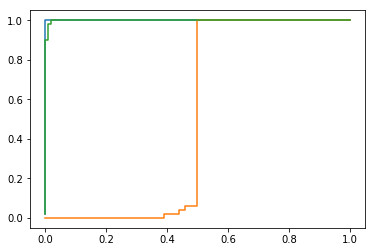

In [16]:
plt.plot(fpr0, tpr0, label="class 0")
plt.plot(fpr1, tpr1, label="class 1")
plt.plot(fpr2, tpr2, label="class 2")
plt.show()

In [14]:
from sklearn.metrics import auc
auc(fpr0, tpr0), auc(fpr1, tpr1), auc(fpr2, tpr2)

(1.0, 0.50419999999999998, 0.99880000000000002)